... storing 'subject_id' as categorical
... storing 'tissue' as categorical
... storing 'pid' as categorical
... storing 'celltype' as categorical
... storing 'clinical' as categorical


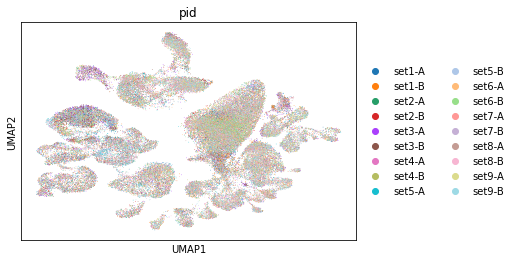

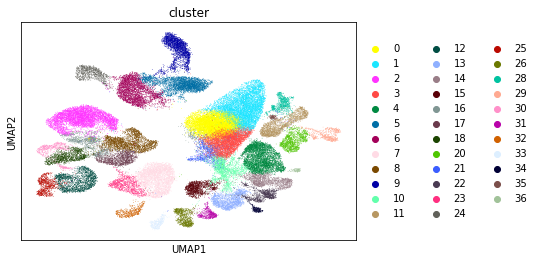

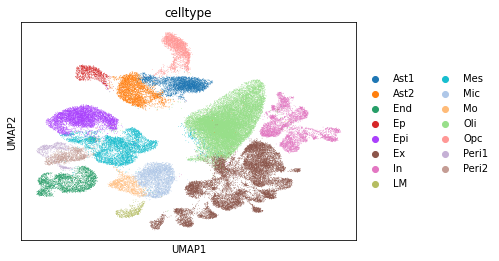

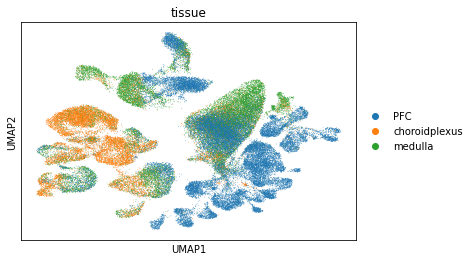

In [1]:
import os
import scipy.sparse as sp_sparse
import scanpy as sc
import numpy as np
from anndata import AnnData
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
#import harmonypy as hm

def map_ct(b):
    if b in bc2gct:
        return bc2gct[b]
    else:
        return 'nan'

folder = './processed_data/clean_data/'

npc = 50

df_pca = pd.read_csv(folder + 'reductions/seurat_pca.csv', index_col=0).iloc[:, :20]
df_umap = pd.read_csv(folder + 'reductions/seurat_umap_harmony%d.csv' % npc, index_col=0)

df_meta = pd.read_csv(folder + 'metadata.csv', index_col = 0)

df_meta.cluster = df_meta.cluster.astype('category')


data_obj = AnnData(X = df_pca.values, 
                   var = pd.DataFrame([], index = df_pca.columns), 
                   obs = df_meta)

data_obj.obsm['X_umap'] = df_umap.values

sc.pl.umap(data_obj, color = ['pid'])
sc.pl.umap(data_obj, color = ['cluster'])
sc.pl.umap(data_obj, color = ['celltype'])
sc.pl.umap(data_obj, color = ['tissue'])

In [2]:
df_gene = pd.read_csv(folder + 'gene_expression.csv', index_col = 0)

In [3]:
data_obj = AnnData(X = df_gene.values, 
                   var = pd.DataFrame([], index = df_gene.columns), 
                   obs = df_meta)

In [5]:
df_qc = sc.pp.calculate_qc_metrics(data_obj)

In [6]:
df_qc[0]

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
AAACCCACAACCCTAA-frozen-COVID-set1-A,589,6.380123,738.0,6.605298,21.680217,33.739837,47.289973,87.940379
AAACCCACATCGGATT-frozen-COVID-set1-A,680,6.523562,957.0,6.864848,26.227795,36.677116,49.843260,81.191223
AAACCCAGTCGTATTG-frozen-COVID-set1-A,1451,7.280697,2507.0,7.827241,21.619465,30.315118,41.643398,62.066215
AAACCCATCAGTGATC-frozen-COVID-set1-A,421,6.045005,614.0,6.421622,33.550489,47.719870,64.006515,100.000000
AAACCCATCCACTTTA-frozen-COVID-set1-A,5225,8.561401,20140.0,9.910513,23.485601,29.612711,37.328699,50.978153
...,...,...,...,...,...,...,...,...
TTTGGTTCAGGCCTGT-frozen-COVID-set9-B,3738,8.226573,12375.0,9.423514,20.258586,27.062626,36.202020,52.832323
TTTGGTTCATCCTATT-frozen-COVID-set9-B,5494,8.611594,31243.0,10.349583,27.228499,35.857632,45.565407,60.112665
TTTGTTGAGTATGGAT-frozen-COVID-set9-B,3637,8.199189,10172.0,9.227492,23.043649,29.374754,37.672041,52.791978
TTTGTTGCAGCGTGCT-frozen-COVID-set9-B,1889,7.544332,4733.0,8.462525,21.043735,29.727446,41.728291,63.215719


In [7]:
data_obj.obs = pd.concat([df_qc[0], data_obj.obs], axis = 1)

In [8]:
data_obj.obsm['X_umap'] = df_umap.values

In [9]:
mt_genes = np.array([g.startswith('MT-') for g in data_obj.var.index])
mt_count = np.array(data_obj[:, mt_genes].X.sum(axis = 1))
total_count = np.array(data_obj.X.sum(axis = 1))
mt_fraction = mt_count / total_count
print(np.sum(mt_fraction < 0.05))

68555


In [10]:
data_obj.obs['mt_fraction'] = mt_fraction

... storing 'subject_id' as categorical
... storing 'tissue' as categorical
... storing 'pid' as categorical
... storing 'celltype' as categorical
... storing 'clinical' as categorical


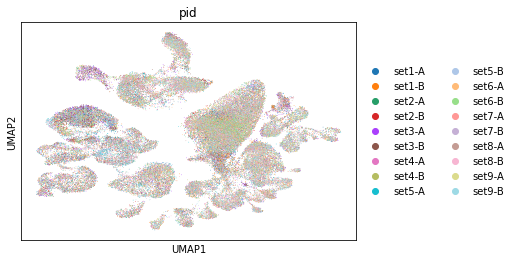

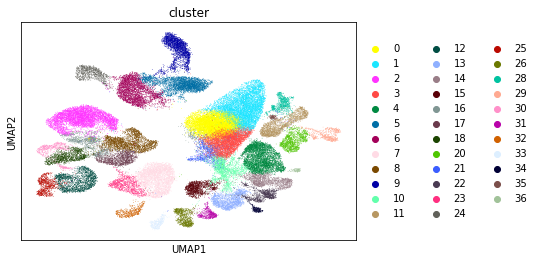

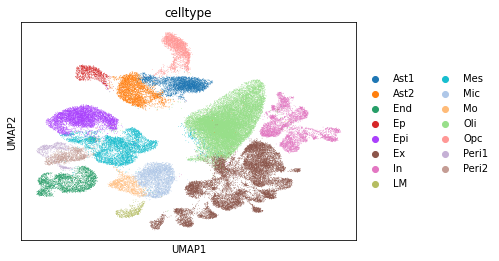

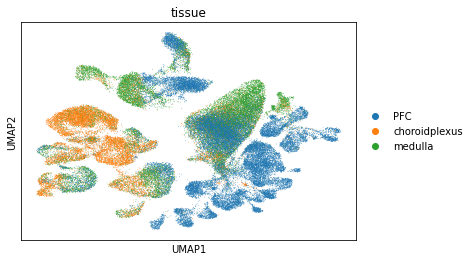

In [11]:
sc.pl.umap(data_obj, color = ['pid'])
sc.pl.umap(data_obj, color = ['cluster'])
sc.pl.umap(data_obj, color = ['celltype'])
sc.pl.umap(data_obj, color = ['tissue'])

In [18]:
set(zip(df_meta.subject_id, df_meta.is_covid))

{('NPBB052', 0),
 ('NPBB098', 0),
 ('NPBB105', 0),
 ('NPBB113', 0),
 ('NPBB131', 1),
 ('NPBB135', 1),
 ('NPBB137', 1),
 ('NPBB138', 1),
 ('NPBB139', 1)}

In [19]:
subject_id2showname = {'NPBB052':'Ctrl 1',
 'NPBB098':'Ctrl 2',
 'NPBB105':'Ctrl 3',
 'NPBB113':'Ctrl 4',
 'NPBB131':'Case 1',
 'NPBB135':'Case 2',
 'NPBB137':'Case 3',
 'NPBB138':'Case 4',
 'NPBB139':'Case 5',}
data_obj.obs['showname'] = [subject_id2showname[s] for s in data_obj.obs.subject_id]

... storing 'showname' as categorical


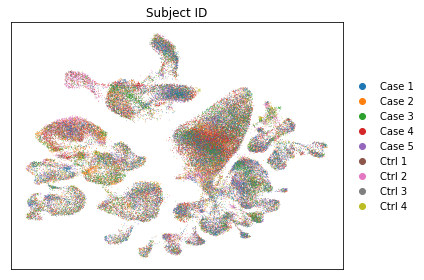

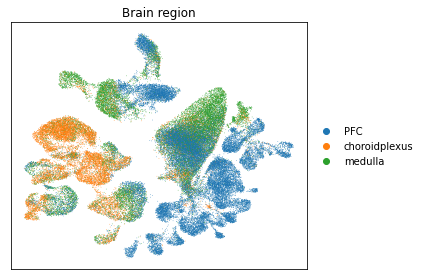

In [20]:
fig, axes = plt.subplots(1, 1, figsize = (6, 4))

ax = axes
sc.pl.umap(data_obj, color = ['showname'], show = False, ax = ax)
plt.sca(ax)
plt.xlabel('')
plt.ylabel('')
plt.title('Subject ID')
plt.tight_layout()
plt.savefig('figs/umap_subject_id.pdf')
plt.savefig("figs/png/umap_subject_id.png", dpi = 600)

fig, axes = plt.subplots(1, 1, figsize = (6, 4))
ax = axes
ax = sc.pl.umap(data_obj, color = ['tissue'], show = False, ax = ax)
plt.sca(ax)
plt.xlabel('')
plt.ylabel('')
plt.title('Brain region')
plt.tight_layout()
plt.savefig('figs/umap_brain_region.pdf')
plt.savefig("figs/png/umap_brain_region.png", dpi = 600)
plt.show()
#sc.pl.umap(data_obj, color = ['log1p_n_genes_by_counts'])

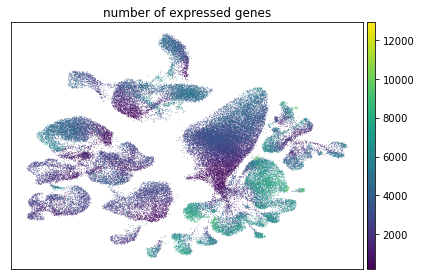

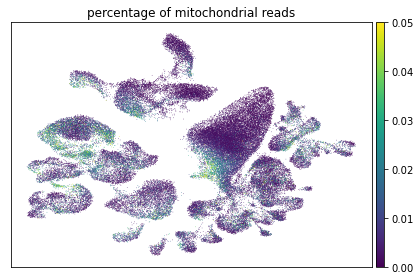

In [21]:
fig, axes = plt.subplots(1, 1, figsize = (6, 4))

ax = axes
sc.pl.umap(data_obj, color = ['n_genes_by_counts'], show = False, ax = ax)
plt.sca(ax)
plt.xlabel('')
plt.ylabel('')
plt.title('number of expressed genes')
plt.tight_layout()
plt.savefig('figs/umap_expressed_genes.pdf')
plt.savefig("figs/png/umap_expressed_genes.png", dpi = 600)
fig, axes = plt.subplots(1, 1, figsize = (6, 4))

ax = axes
ax = sc.pl.umap(data_obj, color = ['mt_fraction'], show = False, ax = ax)
plt.sca(ax)
plt.xlabel('')
plt.ylabel('')
plt.title('percentage of mitochondrial reads')
plt.tight_layout()
plt.savefig('figs/umap_mito_reads.pdf')
plt.savefig("figs/png/umap_mito_reads.png", dpi = 600)
plt.show()
#sc.pl.umap(data_obj, color = ['log1p_n_genes_by_counts'])

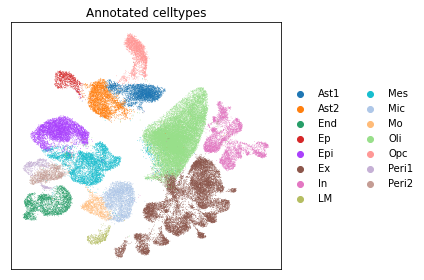

In [22]:
fig, axes = plt.subplots(1, 1, figsize = (6, 4))

ax = axes
sc.pl.umap(data_obj, color = ['celltype'], show = False, ax = ax)
plt.sca(ax)
plt.xlabel('')
plt.ylabel('')
plt.title('Annotated celltypes')
plt.tight_layout()
plt.savefig('figs/umap_celltype.pdf')
plt.savefig("figs/png/umap_celltype.png", dpi = 600)
plt.show()

In [23]:
data_obj.obs['clinical2'] = [s.split('_')[0] for s in data_obj.obs['clinical']]

... storing 'clinical2' as categorical


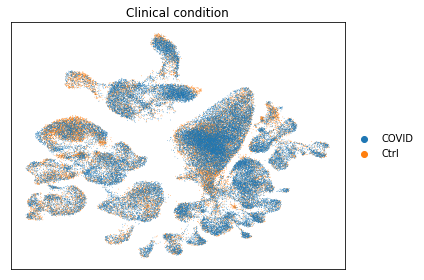

In [24]:
fig, axes = plt.subplots(1, 1, figsize = (6, 4))

ax = axes
sc.pl.umap(data_obj, color = ['clinical2'], show = False, ax = ax)
plt.sca(ax)
plt.xlabel('')
plt.ylabel('')
plt.title('Clinical condition')
plt.tight_layout()
#plt.savefig('figs/umap_clinical_condition.pdf')

In [25]:
mgenes = [## neuron
          ('SYT1', 'All neurons'), 
          ('SLC17A7', 'Excitatory neurons'), 
          ('GAD1', 'Inhibitory neurons'), 
          ## Astrocyte
           ('VCAN', 'OPC'),
           ('AQP4', 'Ast'),
           ('SLC4A4', 'Ast'),
           ('MOBP', 'Oli'),
    
          ## Chp compartment
          ('HTR2C', 'ChP Epithelium'),
          ('FLT1', 'Endothelium'),
          ('COL1A1', 'ChP Mesenchyme'),
          ('CFAP299', 'Ependyma'),
          ('PDGFRB', 'Pericyte'),
          
          ## immune cell compartment
           ('APBB1IP', 'Microglia'),
           ('PTPRC', 'CD45+'),  
           ('CD96', 'Lymphocyte'),  
           ('CD163', 'Monocyte'),
                     
           
            ]

"\nmgenes = [('SYT1', 'All neurons'), \n        ('SLC17A7', 'Excitatory neurons'), \n          ('GAD1', 'Inhibitory neurons'), \n          ('FLT1', 'Endo'), \n          #('DUSP1', 'Astrocytes'), \n          ('AQP1', 'Epithelium'), \n          ('PDGFRB', 'Pericyte'),\n          #('MOBP', 'Oli'),\n          # ('SLC1A2', 'Ast/OPC'),\n          # ('AQP4', 'Ast'),\n           ('SLC4A4', 'Ast'),\n           # ('APBB1IP', 'Mic'),\n           # ('CD163', 'Macrophage'),\n           # ('PTPRC', 'CD45+'),  \n           # ('CD96', 'T/NK'),  \n            ('LAMA2', 'smooth muscle'),\n          #  ('ACTA2', 'bm'),\n          #  ('VIM', 'fibro')\n          ('CLIC6', '??'),\n          ('HTR2C', '??'),\n           ('MSX1', 'ImChP'), \n          ('OTX2', 'ImChP'), \n          #('RSPO3', 'ImChP'),\n          ('TTR', 'mChP'),\n          ('DCN', 'stroma') ,\n          #('LUM', 'stroma'), \n          #('APOA2', 'lipo'),\n          ('CLDN5', 'tight'),\n          ('COL1A1', 'stroma')\n          #('DLK1', 'str

In [26]:
set(df_meta.celltype)

{'Ast1',
 'Ast2',
 'End',
 'Ep',
 'Epi',
 'Ex',
 'In',
 'LM',
 'Mes',
 'Mic',
 'Mo',
 'Oli',
 'Opc',
 'Peri1',
 'Peri2'}

<ipython-input-27-8c833dee5c86>:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


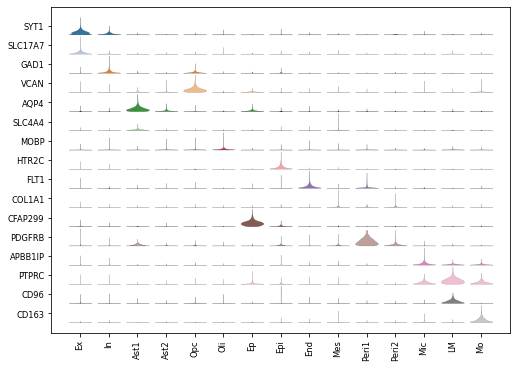

In [27]:
ct_order = ['Ex', 'In', 'Ast1', 'Ast2',  
            'Opc', 'Oli', 
            'Ep', 'Epi', 'End', 
            'Mes', 'Peri1', 'Peri2', 
            'Mic', 'LM', 'Mo']

sc.pl.stacked_violin(data_obj, [m[0] for m in mgenes], groupby = 'celltype',
                     swap_axes = True, figsize=(10, 6), dendrogram=False,
                     vmax = 20, row_palette='tab20', 
                     categories_order=ct_order,
                     fontsize = 12
                     #var_group_positions = [[0, 2]],
                     #var_group_labels = ['neuron']
                     , show = False,
                    )
plt.tight_layout()
plt.savefig('figs/marker_stacked_violin_raw.pdf')
plt.savefig("figs/png/marker_stacked_violin_raw.png", dpi = 600)
plt.show()

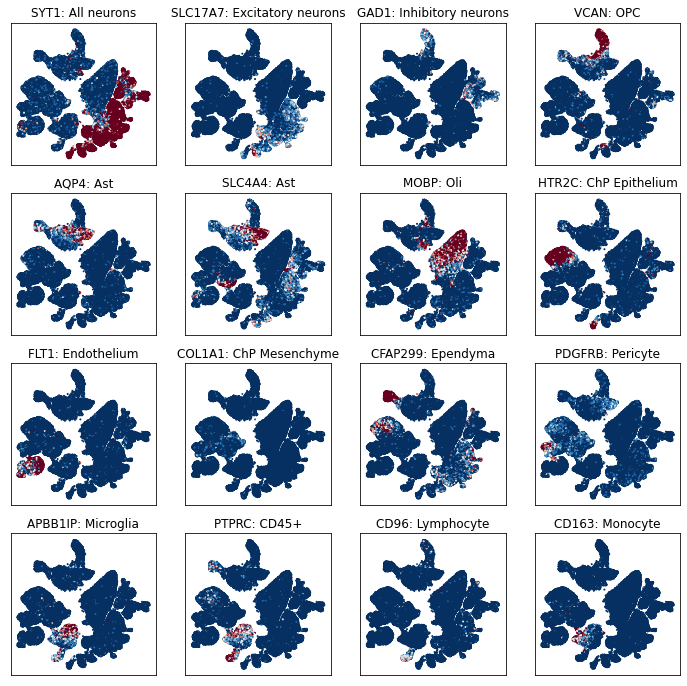

In [28]:
Xre = df_umap.values

fig, axes = plt.subplots(4, 4, figsize = (12, 12))

#for i, (m, ct) in enumerate(mgenes):
for i in range(16):
    ax = axes[i // 4, i % 4]
    if i >= len(mgenes):
        plt.sca(ax)
        plt.axis('off')
        continue
    m, ct = mgenes[i]
    vec = df_gene[m].values
    vec = np.squeeze(vec)

    ax.scatter(Xre[:, 0], Xre[:, 1], s = 1, 
         c = vec, cmap = 'RdBu_r', vmax = 10)
    ax.set_title('%s: %s' % (m, ct))
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.savefig('figs/marker_umap.pdf')
plt.savefig("figs/png/marker_umap.png", dpi = 600)
plt.show()
